In [1]:
#World War II Weather Conditions Analysis

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.metrics import r2_score 


In [3]:
data=pd.read_csv("C:\\Users\\G\\Desktop\\1111DATATHON\\ww2-temperatures-case-study.csv",low_memory=False)

In [4]:
data.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [5]:
df=pd.DataFrame(data)

In [6]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [7]:
df

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df=df.drop(['WindGustSpd'], axis=1)
df=df.drop(['Snowfall'], axis=1)
df=df.drop(['PoorWeather'], axis=1)
df=df.drop(['YR'], axis=1)
df=df.drop(['DR'], axis=1)
df=df.drop(['SPD'], axis=1)
df=df.drop(['SNF'], axis=1)
df=df.drop(['SND'], axis=1)
df=df.drop(['FT'], axis=1)
df=df.drop(['FB'], axis=1)
df=df.drop(['FTI'], axis=1)
df=df.drop(['ITH'], axis=1)
df=df.drop(['PGT'], axis=1)
df=df.drop(['TSHDSBRSGF'], axis=1)
df=df.drop(['SD3'], axis=1)
df=df.drop(['RHX'], axis=1)
df=df.drop(['RHN'], axis=1)
df=df.drop(['RVG'], axis=1)
df=df.drop(['WTE'], axis=1)


In [9]:
df

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,MO,DA,PRCP,MAX,MIN,MEA
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,7,1,0.04,78.0,72.0,75.0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,7,2,0,84.0,71.0,78.0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,7,3,0.1,79.0,72.0,76.0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,7,4,0.1,80.0,72.0,76.0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,7,5,0,80.0,71.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,28.333333,18.333333,23.333333,12,27,0,83.0,65.0,74.0
119036,82506,1945-12-28,9.906,29.444444,18.333333,23.888889,12,28,0.39,85.0,65.0,75.0
119037,82506,1945-12-29,0,28.333333,18.333333,23.333333,12,29,0,83.0,65.0,74.0
119038,82506,1945-12-30,0,28.333333,18.333333,23.333333,12,30,0,83.0,65.0,74.0


In [10]:
df.loc[df["Precip"] == "T"] =0
df.loc[df["PRCP"] == "T"] =0
df

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,MO,DA,PRCP,MAX,MIN,MEA
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,7,1,0.04,78.0,72.0,75.0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,7,2,0,84.0,71.0,78.0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,7,3,0.1,79.0,72.0,76.0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,7,4,0.1,80.0,72.0,76.0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,7,5,0,80.0,71.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,28.333333,18.333333,23.333333,12,27,0,83.0,65.0,74.0
119036,82506,1945-12-28,9.906,29.444444,18.333333,23.888889,12,28,0.39,85.0,65.0,75.0
119037,82506,1945-12-29,0,28.333333,18.333333,23.333333,12,29,0,83.0,65.0,74.0
119038,82506,1945-12-30,0,28.333333,18.333333,23.333333,12,30,0,83.0,65.0,74.0


In [11]:
shape=df.shape
print(shape)

(119040, 12)


In [12]:
df.describe()

,STA,MaxTemp,MinTemp,MeanTemp,MO,DA,MAX,MIN,MEA
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,118613.000000,118618.000000,118589.000000
mean,25557.791003,23.420559,15.275146,19.341762,5.777823,13.570472,69.904260,55.187408,62.548651
std,22008.785725,12.357750,9.775119,10.859587,3.952088,9.832087,31.375166,25.936473,28.421880
min,0.000000,-33.333333,-38.333333,-35.555556,0.000000,0.000000,-28.000000,-37.000000,-32.000000
25%,10803.000000,18.888889,7.777778,13.888889,2.000000,4.000000,67.000000,47.000000,58.000000
50%,20501.000000,28.888889,19.444444,24.444444,6.000000,13.000000,84.000000,67.000000,76.000000
75%,33117.000000,31.111111,22.777778,26.666667,9.000000,22.000000,88.000000,73.000000,80.000000
max,82506.000000,50.000000,34.444444,40.000000,12.000000,31.000000,122.000000,94.000000,104.000000


In [13]:
#STA ,Date,MO,DA,MEA can be considered to have categorical values.

In [14]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   Precip    119040 non-null  object 
 3   MaxTemp   119040 non-null  float64
 4   MinTemp   119040 non-null  float64
 5   MeanTemp  119040 non-null  float64
 6   MO        119040 non-null  int64  
 7   DA        119040 non-null  int64  
 8   PRCP      117108 non-null  object 
 9   MAX       118613 non-null  float64
 10  MIN       118618 non-null  float64
 11  MEA       118589 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 10.9+ MB


In [15]:

result1 = df.agg({'MaxTemp': ['mean', 'min', 'max']})
result1

,MaxTemp
mean,23.420559
min,-33.333333
max,50.000000


In [16]:
result2 = df.agg({'MinTemp': ['mean', 'min', 'max']})
result2

,MinTemp
mean,15.275146
min,-38.333333
max,34.444444


In [17]:
result3 = df.agg({'MeanTemp': ['mean', 'min', 'max']})
result3

,MeanTemp
mean,19.341762
min,-35.555556
max,40.000000


In [18]:
result4 = df.agg({'MO': ['mean', 'min', 'max']})
result4

,MO
mean,5.777823
min,0.000000
max,12.000000


In [19]:
result5 = df.agg({'DA': ['mean', 'min', 'max']})
result5

,DA
mean,13.570472
min,0.000000
max,31.000000


In [20]:
result6 = df.agg({'MAX': ['mean', 'min', 'max']})
result6

,MAX
mean,69.90426
min,-28.00000
max,122.00000


In [21]:
result7 = df.agg({'MIN': ['mean', 'min', 'max']})
result7

,MIN
mean,55.187408
min,-37.000000
max,94.000000


In [22]:
result8 = df.agg({'MEA': ['mean', 'min', 'max']})
result8

,MEA
mean,62.548651
min,-32.000000
max,104.000000


array([[<AxesSubplot:title={'center':'STA'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'MinTemp'}>],
       [<AxesSubplot:title={'center':'MeanTemp'}>,
        <AxesSubplot:title={'center':'MO'}>,
        <AxesSubplot:title={'center':'DA'}>],
       [<AxesSubplot:title={'center':'MAX'}>,
        <AxesSubplot:title={'center':'MIN'}>,
        <AxesSubplot:title={'center':'MEA'}>]], dtype=object)

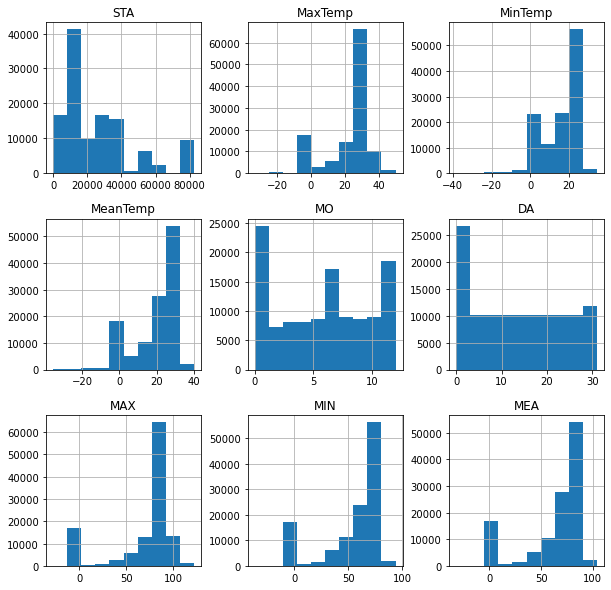

In [23]:

df.hist(figsize=(10,10))


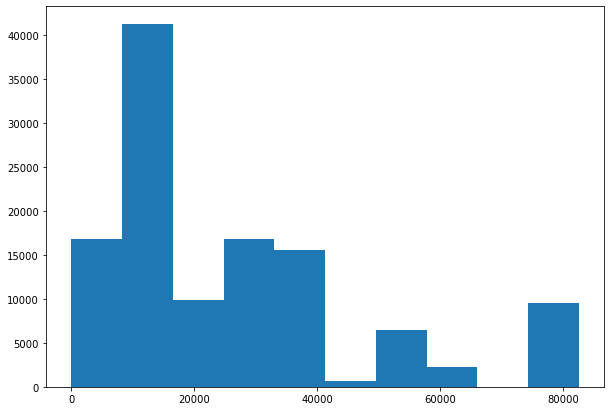

<AxesSubplot:>

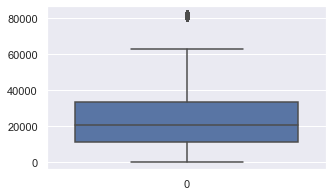

In [24]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['STA'])
plt.show()
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(data=df['STA'])

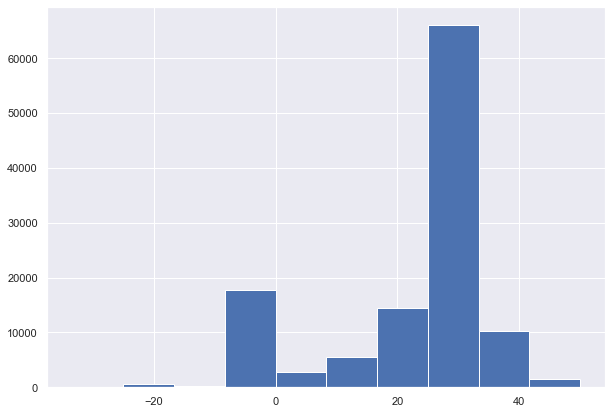

<AxesSubplot:>

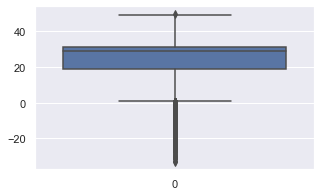

In [25]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['MaxTemp'])
plt.show()
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(data=df['MaxTemp'])

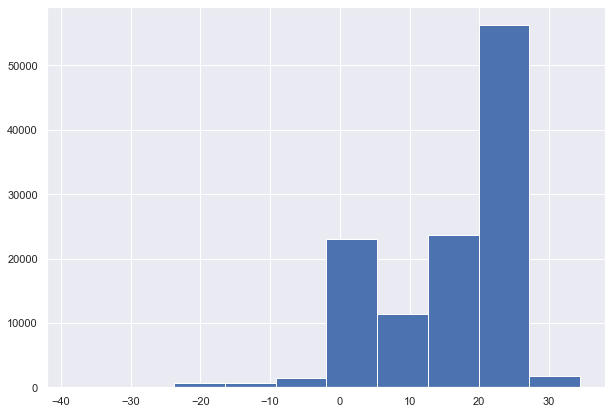

<AxesSubplot:>

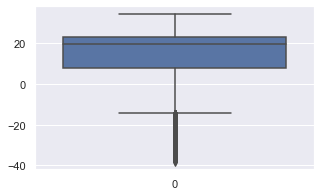

In [26]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['MinTemp'])
plt.show()
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(data=df['MinTemp'])

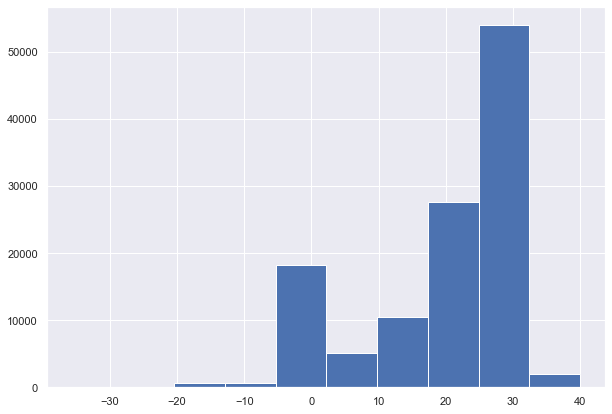

<AxesSubplot:>

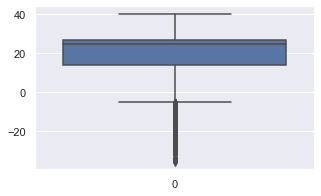

In [27]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['MeanTemp'])
plt.show()
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(data=df['MeanTemp'])

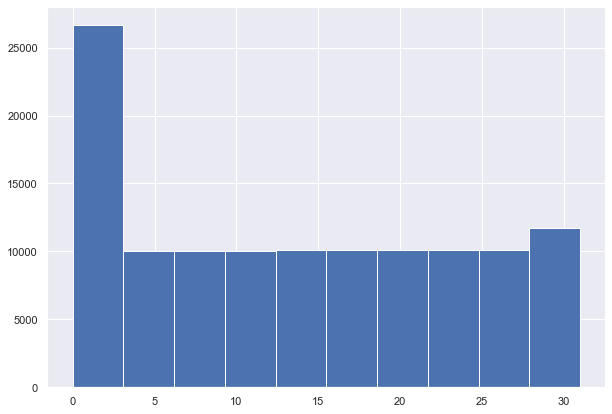

<AxesSubplot:>

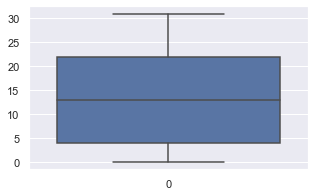

In [28]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['DA'])
plt.show()
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(data=df['DA'])

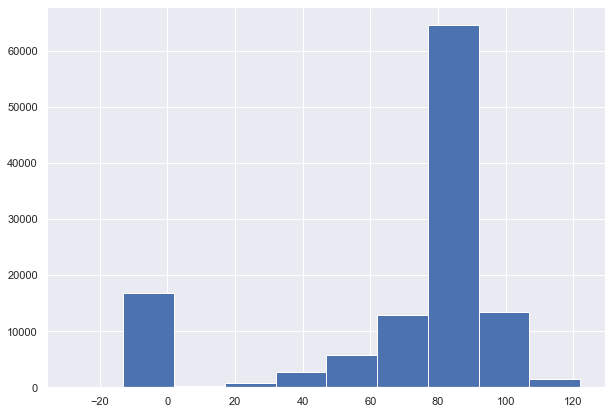

<AxesSubplot:>

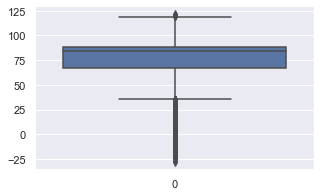

In [29]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['MAX'])
plt.show()
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(data=df['MAX'])

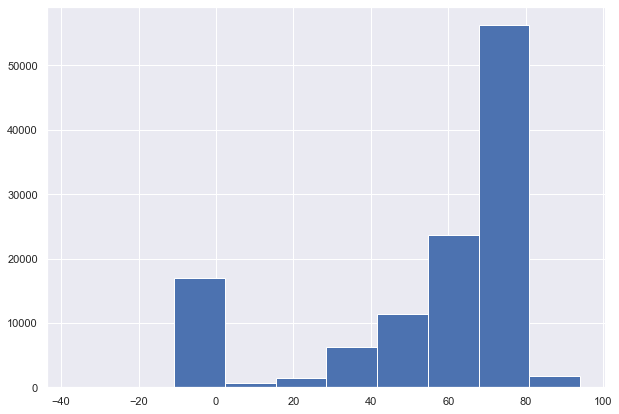

<AxesSubplot:>

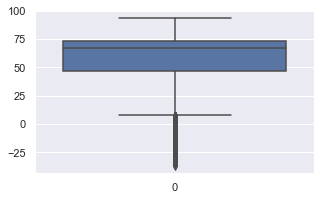

In [30]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['MIN'])
plt.show()
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(data=df['MIN'])

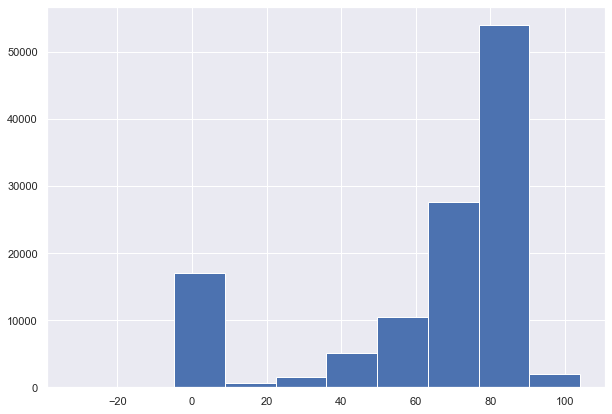

<AxesSubplot:>

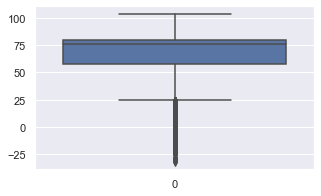

In [31]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['MEA'])
plt.show()
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(data=df['MEA'])

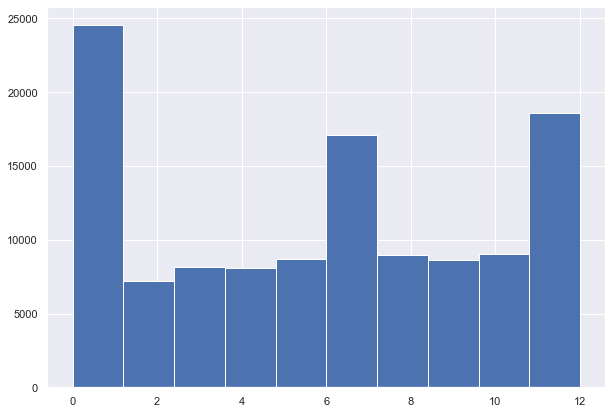

<AxesSubplot:>

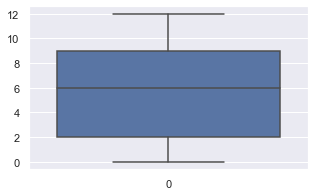

In [32]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['MO'])
plt.show()
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(data=df['MO'])

array([[<AxesSubplot:xlabel='STA', ylabel='STA'>,
        <AxesSubplot:xlabel='MaxTemp', ylabel='STA'>,
        <AxesSubplot:xlabel='MinTemp', ylabel='STA'>,
        <AxesSubplot:xlabel='MeanTemp', ylabel='STA'>,
        <AxesSubplot:xlabel='MO', ylabel='STA'>,
        <AxesSubplot:xlabel='DA', ylabel='STA'>,
        <AxesSubplot:xlabel='MAX', ylabel='STA'>,
        <AxesSubplot:xlabel='MIN', ylabel='STA'>,
        <AxesSubplot:xlabel='MEA', ylabel='STA'>],
       [<AxesSubplot:xlabel='STA', ylabel='MaxTemp'>,
        <AxesSubplot:xlabel='MaxTemp', ylabel='MaxTemp'>,
        <AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>,
        <AxesSubplot:xlabel='MeanTemp', ylabel='MaxTemp'>,
        <AxesSubplot:xlabel='MO', ylabel='MaxTemp'>,
        <AxesSubplot:xlabel='DA', ylabel='MaxTemp'>,
        <AxesSubplot:xlabel='MAX', ylabel='MaxTemp'>,
        <AxesSubplot:xlabel='MIN', ylabel='MaxTemp'>,
        <AxesSubplot:xlabel='MEA', ylabel='MaxTemp'>],
       [<AxesSubplot:xlabel='STA', ylabe

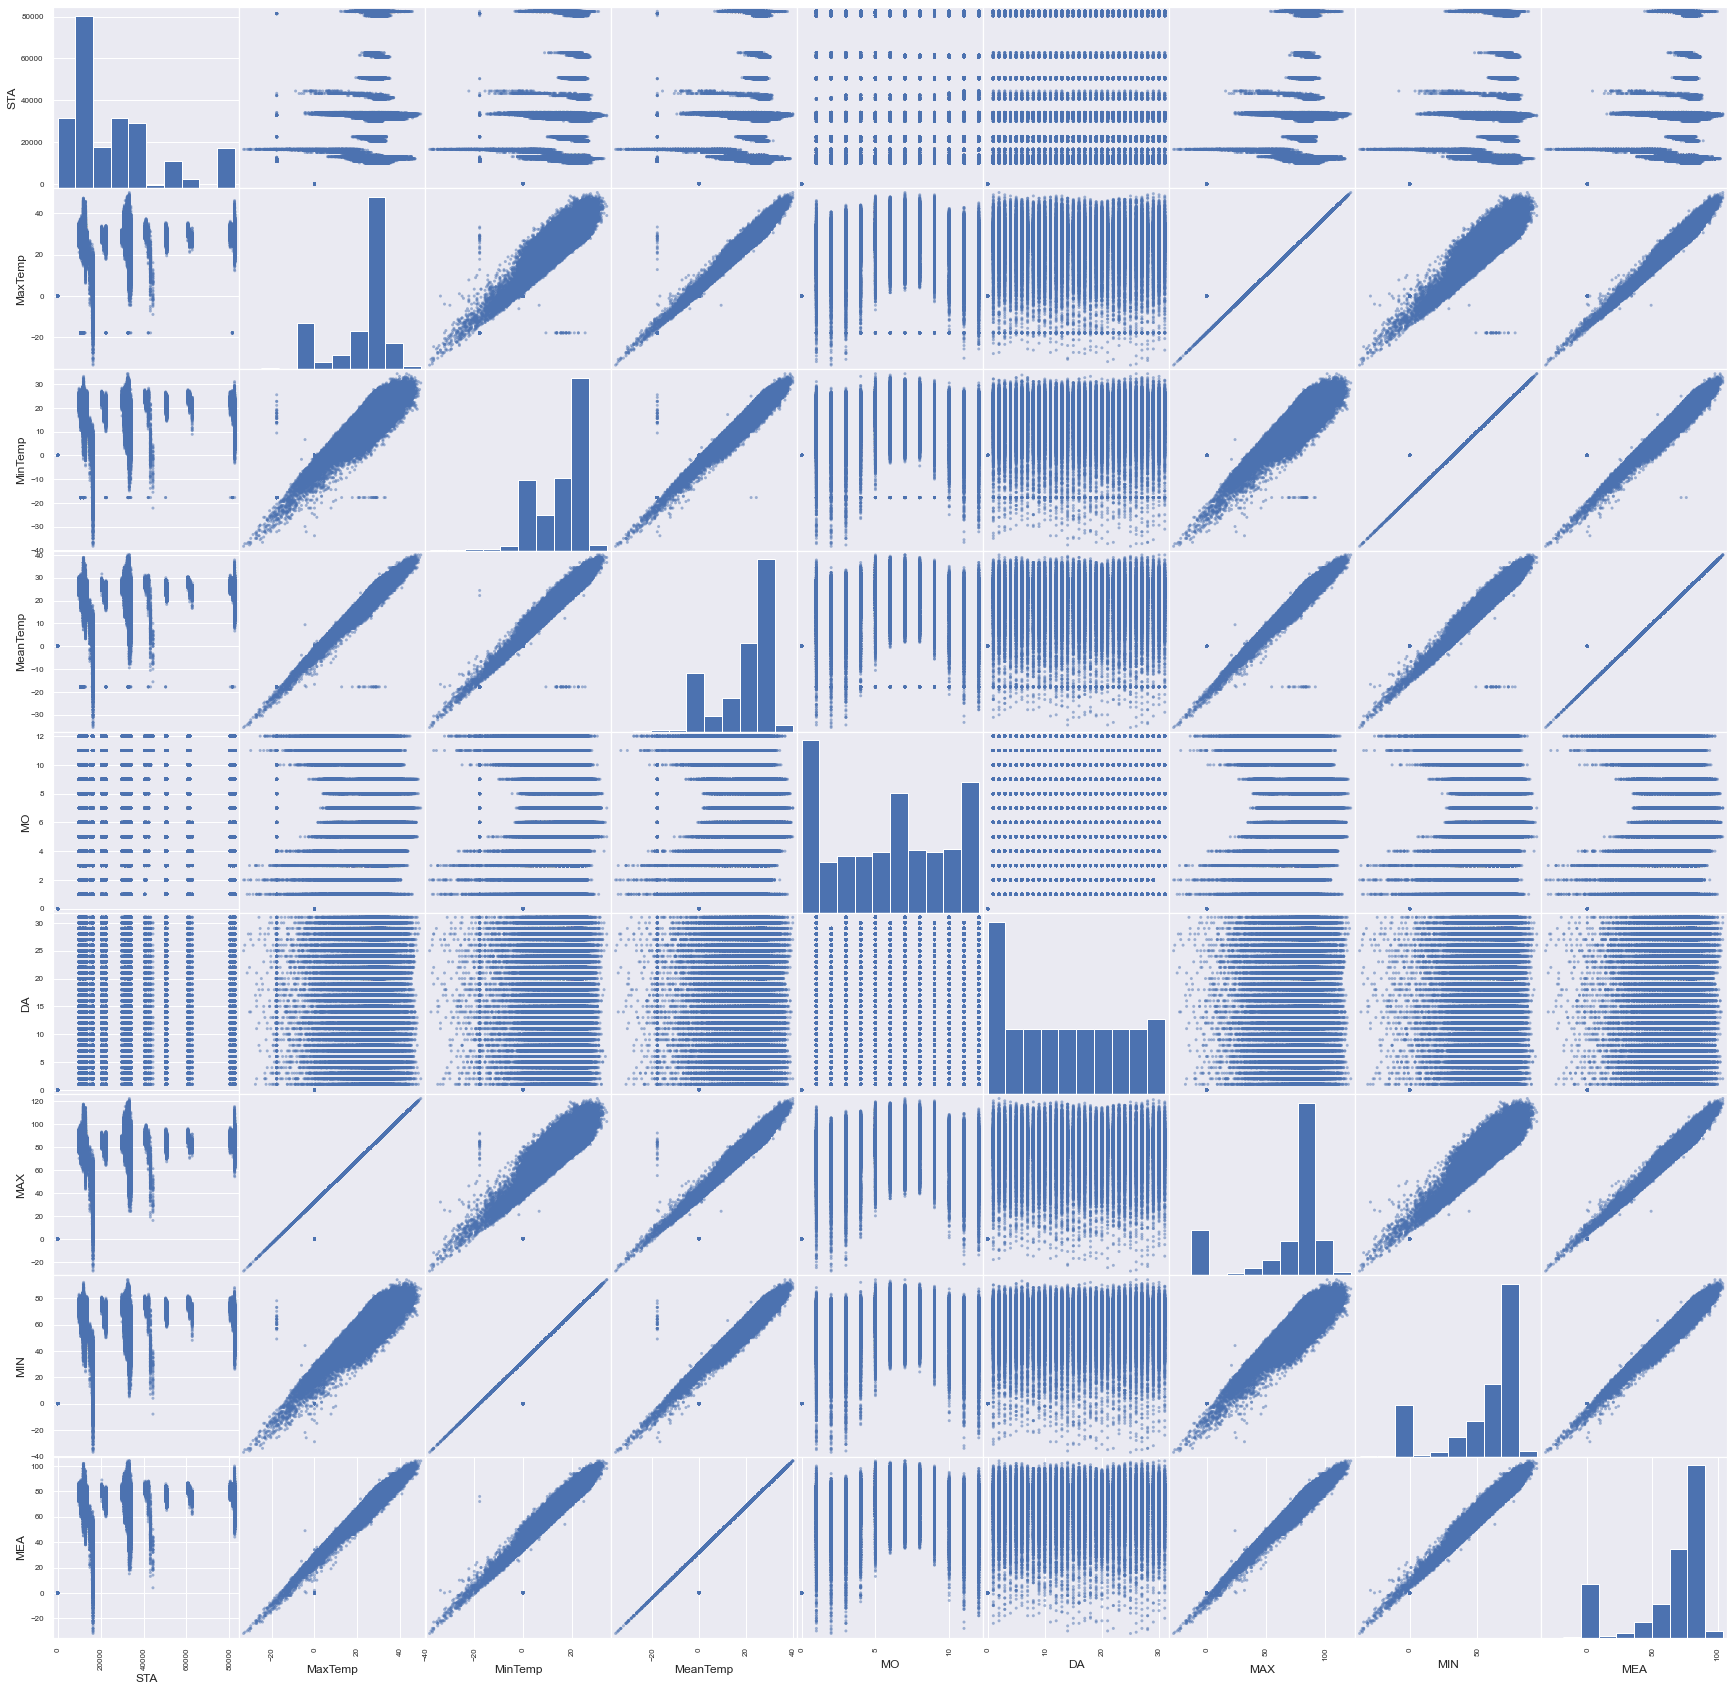

In [33]:
pd.plotting.scatter_matrix(df,figsize=(30,30))

Text(0.5, 1.0, 'Pearson Correlation')

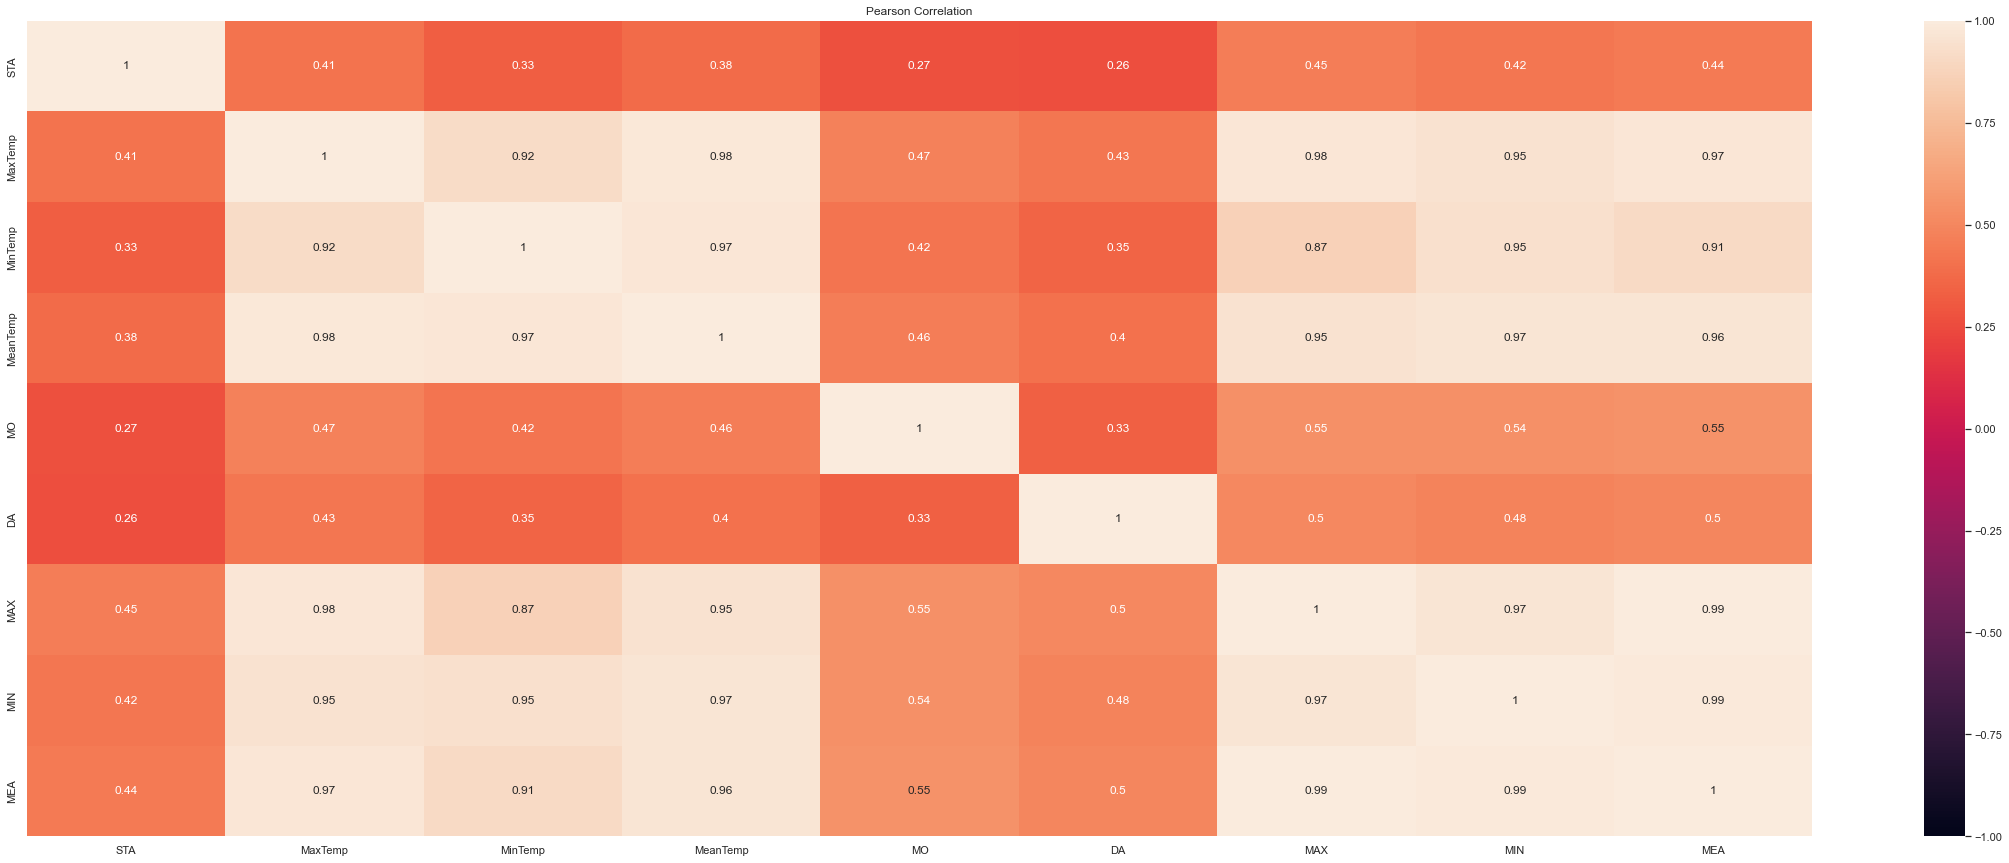

In [34]:
df.corr()
r = df.corr()
plt.figure(figsize=(40,15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.title("Pearson Correlation")


In [35]:
df.columns

Index(['STA', 'Date', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'MO', 'DA',
       'PRCP', 'MAX', 'MIN', 'MEA'],
      dtype='object')

In [36]:
#______________________________________________ model1_______________________________________________

In [37]:

X, y = df["MinTemp"], df["MaxTemp"]
print("Initial shape",X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print("Training Data: ",X_train.shape, y_train.shape)
print("Testing Data: ",X_test.shape, y_test.shape)


Initial shape (119040,) (119040,)
Training Data:  (83328,) (83328,)
Testing Data:  (35712,) (35712,)


In [38]:
model = LinearRegression()
model.fit(np.array(X_train).reshape((-1, 1)), y_train)

LinearRegression()

In [39]:
r_sq = model.score(np.array(X_train).reshape((-1, 1)), y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.8390761345704139
intercept: 5.732968432109271
slope: [1.15801966]


In [40]:
yhat = model.predict(np.array(X_test).reshape((-1, 1)))
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
mse = mean_squared_error(y_test, yhat)
print('MSE: %.3f' % mse)

MAE: 3.930
MSE: 24.551


In [41]:
rmse=mse**0.5
print('RMSE :',rmse)

RMSE : 4.9549036120279775


In [42]:
print(r2_score(y_test,yhat))

0.8403693215023363


In [43]:
#______________________________________________ model2_______________________________________________

In [44]:
X, y = df["MeanTemp"], df["Precip"]
print("Initial shape",X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print("Training Data: ",X_train.shape, y_train.shape)
print("Testing Data: ",X_test.shape, y_test.shape)

Initial shape (119040,) (119040,)
Training Data:  (83328,) (83328,)
Testing Data:  (35712,) (35712,)


In [45]:
model = LinearRegression()
model.fit(np.array(X_train).reshape((-1, 1)), y_train)

LinearRegression()

In [46]:
r_sq = model.score(np.array(X_train).reshape((-1, 1)), y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.014445539930286744
intercept: 0.9069682601190729
slope: [0.11897308]


In [47]:
yhat = model.predict(np.array(X_test).reshape((-1, 1)))
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
mse = mean_squared_error(y_test, yhat)
print('MSE: %.3f' % mse)

MAE: 4.899
MSE: 118.299


In [48]:
rmse=mse**0.5
print('RMSE :',rmse)

RMSE : 10.876513099470985


In [49]:
print(r2_score(y_test,yhat))

0.014571178610557123


In [50]:
#______________________________________________ * * * * *_______________________________________________